# Workflow: Environmental Assessment of Wind Farms in Northern Scotland

As the threat of climate change increases globally, many countries are turning to renewable energy to reduce carbon dioxide and other greenhouse gas emissions. Wind farms are an important source of green energy that are being used to replace electricity derived from fossil fuels, such as coal. While the environmental benefits of replacing fossil fuel derived energy with wind energy are vast, there can be some environmental concerns with installing wind farms in certain areas of ecological importance. 
Use this workflow to analyze wind farm proposals based on their proximity to protected **wild lands** and existing roads.

To learn more about this workflow please see the <a href="http://desktop.arcgis.com/en/analytics/case-studies/minimizing-the-environmental-impact-of-windfarm-installation.htm">Case Study</a>.

In [1]:
from arcgis import *

In [2]:
gis = GIS("https://deldev.maps.arcgis.com", "demo_deldev", "P@ssword123")

In [3]:
items = gis.content.search('NorthScotlandWindfarms owner:VickiCove', outside_org=True)

In [4]:
items

[<Item title:"NorthScotlandWindfarms" type:Feature Layer Collection owner:VickiCove>]

In [5]:
from IPython.display import display

<Item title:"NorthScotlandWindfarms" type:Feature Layer Collection owner:VickiCove>
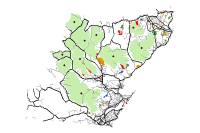

In [6]:
for item in items:
    display(item)

In [7]:
windfarm_item = items[0]

In [10]:
lyrs = windfarm_item.layers

In [11]:
for lyr in lyrs:
    print(lyr.properties.name)

North Scotland Wild Land Points
North Scotland Roads
North Scotland Wild Land Areas
North Scotland Windfarm Proposals


In [14]:
Wild_Land_Points = lyrs[0]
Roads = lyrs[1]
Wild_Land_Areas = lyrs[2]
Windfarm_Proposals = lyrs[3]

## Wind farm visibility from wild lands

Send keyboard focus to media
Wild lands must be both physically and visibly remote. Viewsheds can be used to determine which wind farms will be visible from wild lands. However, the Create Viewshed tool requires point inputs. Therefore, the wild land areas must be converted to point features.

In [16]:
#from arcgis.features.find_locations import find_centroid

In [21]:
#centroid_wild_land_areas = find_centroid()

Now that you have centroids for your wild lands, you can create your viewsheds.
Use the Create Viewshed tool to determine which areas are visible from each observer point.

In [22]:
from arcgis.features.find_locations import create_viewshed

Note:

The height of the observer is set to 1.78 meters (5'10"), which is an average height of an adult male. The height of the other objects on the ground, in this case wind turbines, is 100 meters, which is the height of the most popular wind turbine model. The maximum viewing distance is 50 kilometers, which is the maximum distance allowed in the Create Viewsheds tool. The distances were set using meters and kilometers to complement the data's projected coordinate system during analysis.

In [ ]:
visible_areas = create_viewshed(input_layer=[ {'url': centroid_wild_land_areas.url} ])

## Wind farm infringement on wild land areas and site accessibility

The criteria for designating an area as a wild land include perceived naturalness of land cover, ruggedness of terrain, remoteness from public roads and modern artifacts, and visible lack of buildings, roads, and modern artifacts. Remove the wind farms that are located on wild lands or in view of Wild Lands.

 

Wind farm installation will be less harmful to the environment if the site has existing road access. Remove the sites that are not located on existing roads.

 

Proposals with the status Approved or Installed have already passed their reviews. Keep only the proposals in the Application or Scoping phase.

In [24]:
from arcgis.features.find_locations import find_existing_locations

In [ ]:
windfarms_passed_review = find_existing_locations(input_layers=[{"url":Windfarm_Proposals.url},{"url":Wild_Land_Areas.url},
                                                                {"url":visible_areas.url},{"url":Roads.url}],
                                                 expressions=[{"operator":"","layer":0,"selectingLayer":1,"spatialRel":"notIntersects"},
                                                              {"operator":"and","layer":0,"selectingLayer":2,"spatialRel":"notIntersects"},
                                                              {"operator":"and","layer":0,"selectingLayer":3,"spatialRel":"intersects"},
                                                              {"operator":"and","layer":0,"where":"STATUS = 'Application'"},
                                                              {"operator":"or","layer":0,"where":"STATUS = 'Scoping'"}],
                                                 output_name="windfarms passed review")